<a href="https://colab.research.google.com/github/Reet1992/Time_Series/blob/master/time_series_house_prediction_using_sarimax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/data/ma_lga_12345.csv')

df.head()

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2


In [16]:
df['saledate'] = pd.to_datetime(df['saledate'])

In [17]:
#df['MA'] = df['MA']/10000

In [18]:
df.head()

,saledate,MA,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2


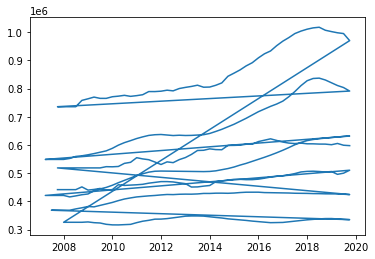

In [19]:
y = plt.plot(df['saledate'],df['MA'])
plt.show()

In [20]:
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [21]:
df['saledate'].min(), df['saledate'].max()

(Timestamp('2007-03-31 00:00:00'), Timestamp('2019-09-30 00:00:00'))

In [22]:
df = df.sort_values('saledate')
df.isnull().sum()

saledate    0
MA          0
type        0
bedrooms    0
dtype: int64

In [23]:
df = df.groupby('saledate').sum().reset_index()

In [24]:
df.head()

,saledate,MA,bedrooms
0,2007-03-31,970260,7
1,2007-06-30,1339077,9
2,2007-09-30,3035746,19
3,2007-12-31,3361822,20
4,2008-03-31,3360077,20


In [25]:
df2 = df.set_index('saledate')
df2.index

DatetimeIndex(['2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30'],
              dtype='datetime64[ns]', name='saledate', freq=None)

In [26]:
df2.head()

,MA,bedrooms
saledate,,
2007-03-31,970260,7
2007-06-30,1339077,9
2007-09-30,3035746,19
2007-12-31,3361822,20
2008-03-31,3360077,20


In [27]:
df2['mean_value'] = df2['MA']/df2['bedrooms']

In [28]:
df2.head()

,MA,bedrooms,mean_value
saledate,,,
2007-03-31,970260,7,138608.571429
2007-06-30,1339077,9,148786.333333
2007-09-30,3035746,19,159776.105263
2007-12-31,3361822,20,168091.100000
2008-03-31,3360077,20,168003.850000


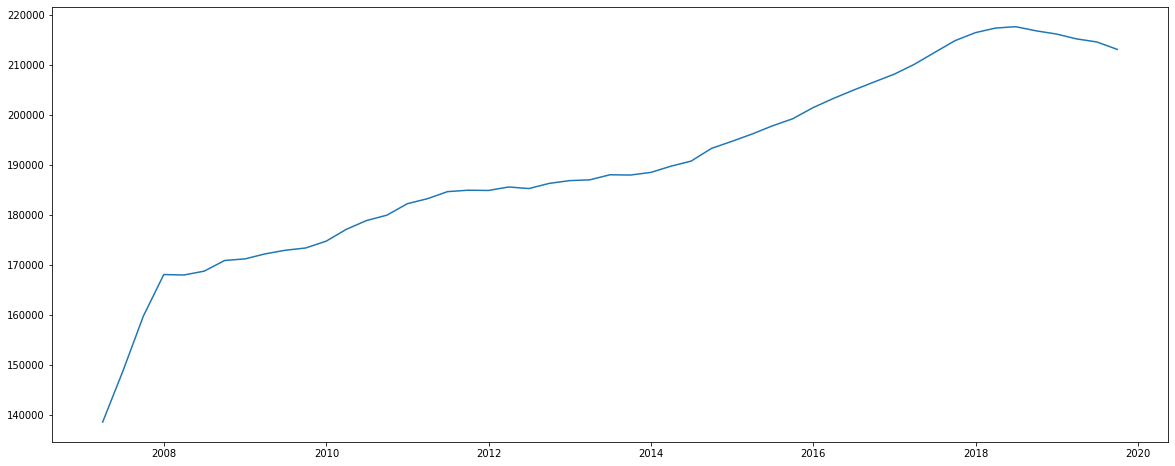

In [63]:
plt.figure(figsize=(20,8))

y = plt.plot(df2.index,df2['mean_value'])
plt.show()

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

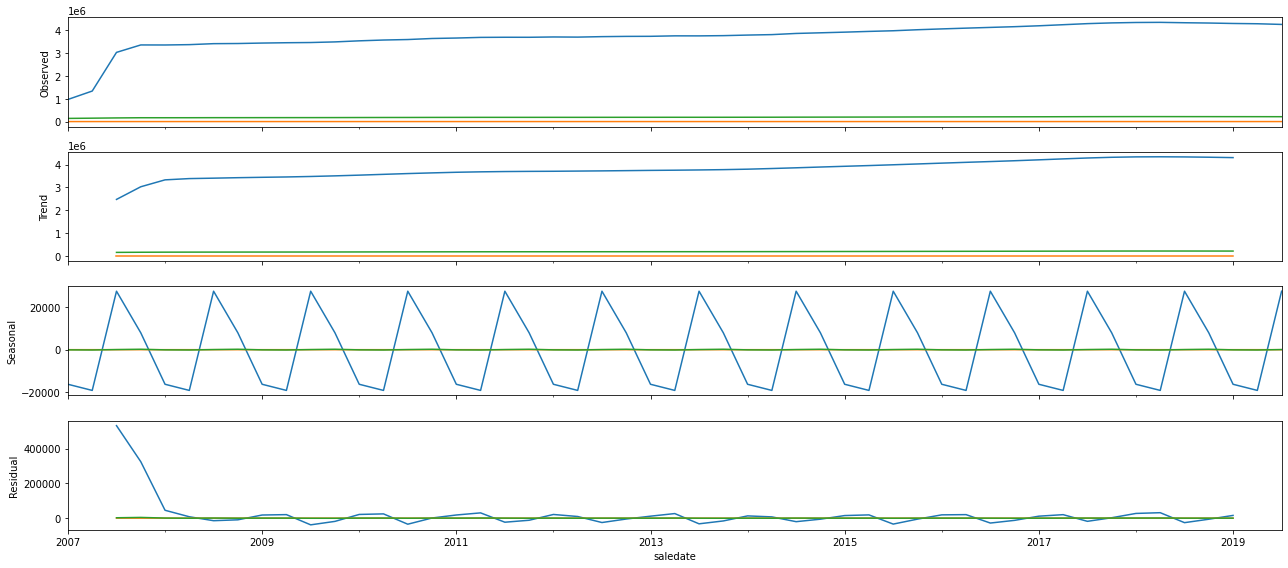

In [32]:
decomposition = sm.tsa.seasonal_decompose(df2, model='additive')
fig = decomposition.plot()
plt.show()

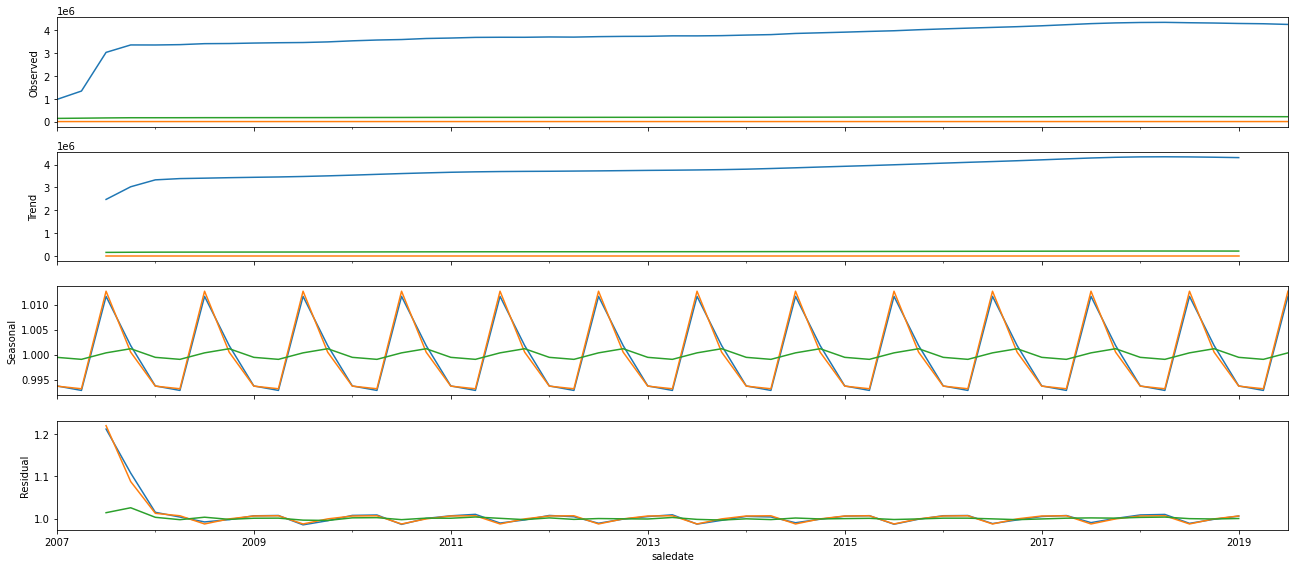

In [34]:
decomposition2 = sm.tsa.seasonal_decompose(df2, model='multiplicative')
fig = decomposition2.plot()
plt.show()

In [35]:
#### Time Series prediction with ARIMA 


p = d = q = range(0, 2)
pd = list(itertools.product(p, d, q))
seasonal_pd = [(x[0], x[1], x[2],16) for x in list(itertools.product(p, d,q))]

In [37]:
seasonal_pd

[(0, 0, 0, 16),
 (0, 0, 1, 16),
 (0, 1, 0, 16),
 (0, 1, 1, 16),
 (1, 0, 0, 16),
 (1, 0, 1, 16),
 (1, 1, 0, 16),
 (1, 1, 1, 16)]

In [38]:

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pd[0], seasonal_pd[0]))
print('SARIMAX: {} x {}'.format(pd[1], seasonal_pd[1]))
print('SARIMAX: {} x {}'.format(pd[2], seasonal_pd[2]))
print('SARIMAX: {} x {}'.format(pd[3], seasonal_pd[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 0) x (0, 0, 0, 16)
SARIMAX: (0, 0, 1) x (0, 0, 1, 16)
SARIMAX: (0, 1, 0) x (0, 1, 0, 16)
SARIMAX: (0, 1, 1) x (0, 1, 1, 16)


In [40]:
for param in pd:
    for param_seasonal in seasonal_pd:        
        mod = sm.tsa.statespace.SARIMAX(df2['mean_value'])
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 16)12 - AIC:965.2354032540682


In [41]:
mod = sm.tsa.statespace.SARIMAX(df2['mean_value'])
results = mod.fit()

In [45]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:             mean_value   No. Observations:                   51
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -480.618
Date:                Sat, 14 Nov 2020   AIC                            965.235
Time:                        02:11:13   BIC                            969.099
Sample:                    03-31-2007   HQIC                           966.712
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.001   1865.808      0.000       0.999       1.001
sigma2      7.626e+06   7.15e-14   1.07e+20      0.000    7.63e+06    7.63e+06
Ljung-Box (Q):                       41.94   Jarque-

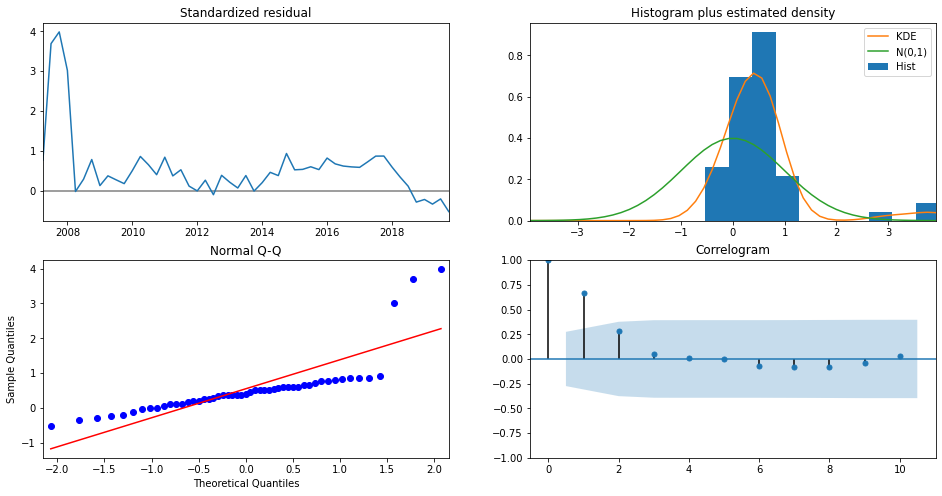

In [46]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


In [47]:
for param in pd:
    for param_seasonal in seasonal_pd:
            mod = sm.tsa.statespace.SARIMAX(df2['mean_value'],order=param,seasonal_order=(0,0,0,0))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))


ARIMA(0, 0, 0)x(0, 0, 0, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(0, 0, 1, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(0, 1, 0, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(0, 1, 1, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(1, 0, 0, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(1, 0, 1, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(1, 1, 0, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 0)x(1, 1, 1, 16)12 - AIC:1386.9998212403907
ARIMA(0, 0, 1)x(0, 0, 0, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(0, 0, 1, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(0, 1, 0, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(0, 1, 1, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(1, 0, 0, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(1, 0, 1, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(1, 1, 0, 16)12 - AIC:1355.09601455627
ARIMA(0, 0, 1)x(1, 1, 1, 16)12 - AIC:1355.09601455627
ARIMA(0, 1, 0)x(0, 0, 0, 16)12 - AIC:936.210945663296
ARIMA(0, 1, 0)x(0, 0, 1, 16)12 - AIC:936.210945663296
ARIMA(0, 1, 

In [48]:
mod = sm.tsa.statespace.SARIMAX(df2['mean_value'],order=(1, 1, 1),seasonal_order=(0,0,0,16))
results = mod.fit()

print(results.summary())

                           Statespace Model Results                           
Dep. Variable:             mean_value   No. Observations:                   51
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -438.531
Date:                Sat, 14 Nov 2020   AIC                            883.062
Time:                        02:12:47   BIC                            888.798
Sample:                    03-31-2007   HQIC                           885.246
                         - 09-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7040      0.016     44.921      0.000       0.673       0.735
ma.L1         -0.5466      0.024    -22.432      0.000      -0.594      -0.499
sigma2      8.576e+05   6.85e+04     12.519      0.0

In [ ]:
#### get the model fitted from the best paramters from the least AIC score#### 

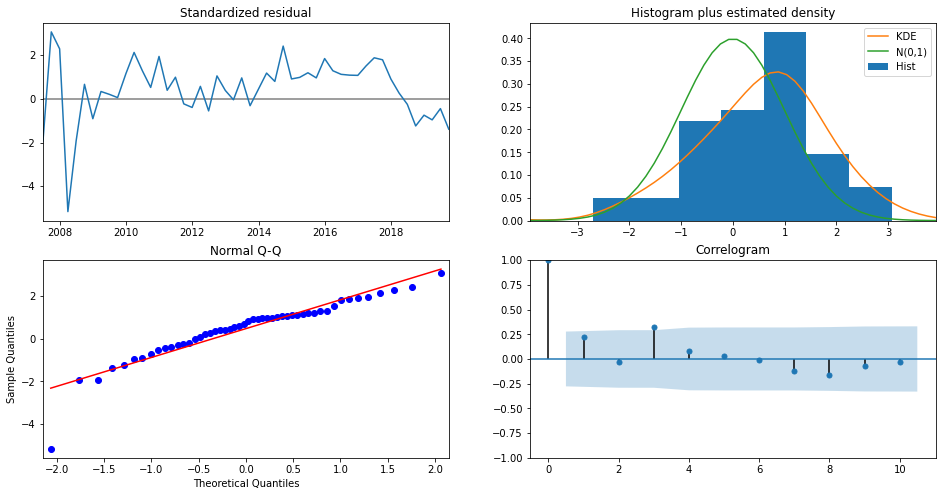

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [50]:
df.tail()

,saledate,MA,bedrooms
46,2018-09-30,4336232,20
47,2018-12-31,4323309,20
48,2019-03-31,4303957,20
49,2019-06-30,4291809,20
50,2019-09-30,4262046,20


In [140]:
len(df)

51

In [144]:
df['saledate'] = df.index

In [53]:
df2.tail()

,MA,bedrooms,mean_value
saledate,,,
2018-09-30,4336232,20,216811.60
2018-12-31,4323309,20,216165.45
2019-03-31,4303957,20,215197.85
2019-06-30,4291809,20,214590.45
2019-09-30,4262046,20,213102.30


In [57]:
df2.index[50]

Timestamp('2019-09-30 00:00:00')

In [85]:
pred = results.get_prediction(start=df2.index[20], dynamic=False)
pred_ci = pred.conf_int()

In [86]:
pred_ci.iloc[:,1]

2012-03-31    186880.184883
2012-06-30    187609.944695
2012-09-30    187159.195305
2012-12-31    188327.720073
2013-03-31    188877.529887
2013-06-30    188968.273715
2013-09-30    190087.671896
2013-12-31    189913.926871
2014-03-31    190470.485226
2014-06-30    191838.825170
2014-09-30    192887.536452
2014-12-31    195695.641975
2015-03-31    197073.622591
2015-06-30    198503.744956
2015-09-30    200150.048181
2015-12-31    201559.458418
2016-03-31    203904.146838
2016-06-30    205730.535817
2016-09-30    207380.685332
2016-12-31    208974.295285
2017-03-31    210540.753404
2017-06-30    212554.315251
2017-09-30    215007.417972
2017-12-31    217424.934323
2018-03-31    218932.044185
2018-06-30    219687.024699
2018-09-30    219776.450724
2018-12-31    218672.249115
2019-03-31    217903.726204
2019-06-30    216818.638195
2019-09-30    216203.724694
Freq: Q-DEC, Name: upper mean_value, dtype: float64

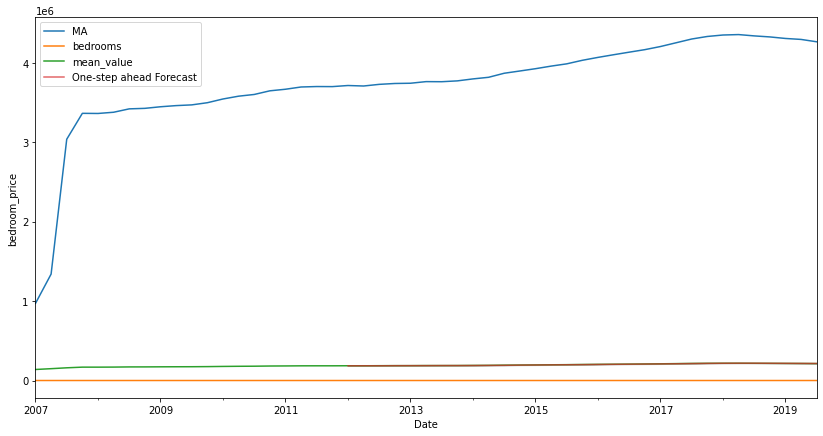

In [87]:
ax = df2['2007-03-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('Date')
ax.set_ylabel('bedroom_price')
plt.legend()
plt.show()

In [88]:
df2.index.min(), df2.index.max()

(Timestamp('2007-03-31 00:00:00'), Timestamp('2019-09-30 00:00:00'))

In [89]:
df2.index.min(), df2.index.max()

(Timestamp('2007-03-31 00:00:00'), Timestamp('2019-09-30 00:00:00'))

In [92]:
y_forecasted = pred.predicted_mean
y_truth = df2['2007-03-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2012-03-31 00:00:00   NaN
2012-06-30 00:00:00   NaN
2012-09-30 00:00:00   NaN
2012-12-31 00:00:00   NaN
2013-03-31 00:00:00   NaN
2013-06-30 00:00:00   NaN
2013-09-30 00:00:00   NaN
2013-12-31 00:00:00   NaN
2014-03-31 00:00:00   NaN
2014-06-30 00:00:00   NaN
2014-09-30 00:00:00   NaN
2014-12-31 00:00:00   NaN
2015-03-31 00:00:00   NaN
2015-06-30 00:00:00   NaN
2015-09-30 00:00:00   NaN
2015-12-31 00:00:00   NaN
2016-03-31 00:00:00   NaN
2016-06-30 00:00:00   NaN
2016-09-30 00:00:00   NaN
2016-12-31 00:00:00   NaN
2017-03-31 00:00:00   NaN
2017-06-30 00:00:00   NaN
2017-09-30 00:00:00   NaN
2017-12-31 00:00:00   NaN
2018-03-31 00:00:00   NaN
2018-06-30 00:00:00   NaN
2018-09-30 00:00:00   NaN
2018-12-31 00:00:00   NaN
2019-03-31 00:00:00   NaN
2019-06-30 00:00:00   NaN
2019-09-30 00:00:00   NaN
MA                    NaN
bedrooms              NaN
mean_value            NaN
dtype: float64
